In [0]:
# 0. Imports required packages for fancy python tool

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline 

In [364]:
# 1. Uplaod the human genome as a dataset matrix with Cell types and genes as axes:


file = 'genome_library.xlsx' #for an earlier version of Excel, you may need to use the file extension of 'xls'
matrix = pd.read_excel(file,sheetname=0,header=0,index_col=False,keep_default_na=True)
matrix.head() # This is a DataFrame


#Displays to the user the possible cell types that are available to the user
#User will input the reference as an input in the next prompt
# f=open('Cell_Type_Library_Prompt (1).txt','r')
# for line in f:
#  print (line)

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,ID_REF,Gene_Symbol,FLiver1,FLiver2,FLiver3,Lung1,Lung2,Lung3,Liver1,Liver2,...,Adrenal3,Lympho1,Lympho2,Lympho3,Marrow1,Marrow2,Marrow3,Retina1,Retina2,Retina3
0,100037,UBE2I,19877.509790,18833.687810,23071.755830,16947.662920,14813.492290,12799.888020,9820.894479,10887.793440,...,23670.753230,15916.358540,16664.433440,16167.554900,30471.107920,31495.886980,33797.405630,23989.130000,24048.572190,22702.656150
1,100039,ANAPC7,6471.961771,9088.806771,7800.685313,6352.833958,7664.380833,7216.553333,6033.967292,5775.593438,...,8478.445208,6342.418958,6786.036771,5159.251979,6227.597604,6367.646146,8033.758542,9753.992708,11015.545000,10180.461770
2,100052,CAMK1G,1299.226979,327.173958,171.388750,516.518021,432.377708,510.381458,653.302396,461.629167,...,713.335417,405.871979,353.164583,592.724583,251.900625,267.649479,295.762500,1094.653125,1381.961979,1076.144063
3,100057,LOC493861,2764.991458,2463.613438,2685.336771,2788.116875,3450.634167,3642.244167,2581.089063,1810.586042,...,5978.012708,6921.569688,5425.580521,4236.506667,5054.482500,4872.174479,6722.127604,4713.508750,5462.288021,5491.454271
4,100058,MGC2963,97619.567080,92407.572810,101247.301000,54686.093650,47691.568960,46854.488330,85359.880940,82348.213540,...,112524.542700,42344.865210,46209.789900,49591.755630,44914.912810,45470.457920,46304.471250,101037.729400,87330.127600,84257.558960


In [365]:
#Takes in the user reference number and will be used as call numbers
#for the evaluation of the datamatrix 
# 2. Isolate Columns into cell types

numrows = len(matrix)-1 # length minus the title row
numcols = len(matrix.columns)

print('This tool uses',numcols,'possible cell types that may overlap.')
print('This tool searches',numrows,'possible genes.')

This tool uses 98 possible cell types that may overlap.
This tool searches 17595 possible genes.


In [366]:
# 3. Print out the cell type library
# matrix = matrix.values # this converts the DataFrame to an array so that it can be indexed
cell_types= matrix.dtypes.index

print('Cell Types:',cell_types)


Cell Types: Index(['ID_REF', 'Gene_Symbol', 'FLiver1', 'FLiver2', 'FLiver3', 'Lung1',
       'Lung2', 'Lung3', 'Liver1', 'Liver2', 'Liver3', 'UHR1', 'UHR2', 'UHR3',
       'Brain1', 'Brain2', 'Brain3', 'FBrain1', 'FBrain2', 'FBrain3',
       'Prostate1', 'Prostate2', 'Prostate3', 'Muscle1', 'Muscle2', 'Muscle3',
       'Heart1', 'Heart2', 'Heart3', 'Spine1', 'Spine2', 'Spine3', 'Tonsil1',
       'Tonsil2', 'Tonsil3', 'Trachea1', 'Trachea2', 'Trachea3', 'Uterus1',
       'Uterus2', 'Uterus3', 'Intestine1', 'Intestine2', 'Intestine3', 'Skin1',
       'Skin2', 'Skin3', 'Ovary1', 'Ovary2', 'Ovary3', 'Testis', 'Testis2',
       'Testis3', 'Pancreas1', 'Pancreas2', 'Pancreas3', 'Thymus1', 'Thymus2',
       'Thymus3', 'FThymus1', 'FThymus2', 'FThymus3', 'Kidney1', 'Kidney2',
       'Kidney3', 'FKidney1', 'FKidney2', 'FKidney3', 'Placenta1', 'Placenta2',
       'Placenta3', 'Thyroid1', 'Thyroid2', 'Thyroid3', 'Salivary1',
       'Salivary2', 'Salivary3', 'Colon1', 'Colon2', 'Colon3', 'Mammary1

In [0]:
# Group all three samples into a single tissue type to call in the dropdown
FLiver=['FLiver1', 'FLiver2', 'FLiver3']
Lung=['Lung1', 'Lung2', 'Lung3']
Liver=['Liver1', 'Liver2', 'Liver3']
UHR=['UHR1', 'UHR2', 'UHR3']
Brain=['Brain1','Brain2', 'Brain3']
FBrain = ['FBrain1', 'FBrain2', 'FBrain3']
Prostate=['Prostate1','Prostate2', 'Prostate3']
Muscle=['Muscle1', 'Muscle2', 'Muscle3']
Heart=['Heart1','Heart2', 'Heart3']
Spine=['Spine1', 'Spine2', 'Spine3']
Tonsil=['Tonsil1', 'Tonsil2','Tonsil3']
Trachea=['Trachea1', 'Trachea2', 'Trachea3']
Uterus=['Uterus1', 'Uterus2','Uterus3']
Intestine=['Intestine1', 'Intestine2', 'Intestine3']
Skin=['Skin1', 'Skin2','Skin3']
Ovary=['Ovary1', 'Ovary2', 'Ovary3']
Testis=['Testis', 'Testis2', 'Testis3']
Pancreas=['Pancreas1', 'Pancreas2', 'Pancreas3']
Thymus=['Thymus1', 'Thymus2', 'Thymus3']
FThymus=['FThymus1', 'FThymus2', 'FThymus3']
Kidney=['Kidney1', 'Kidney2', 'Kidney3']
FKidney=['FKidney1', 'FKidney2', 'FKidney3']
Placenta=['Placenta1', 'Placenta2','Placenta3']
Thyroid=['Thyroid1', 'Thyroid2', 'Thyroid3']
Salivary=['Salivary1','Salivary2', 'Salivary3']
Colon=['Colon1', 'Colon2', 'Colon3']
Mammary=['Mammary1','Mammary2', 'Mammary3']
Spleen=['Spleen1', 'Spleen2', 'Spleen3']
Adrenal=['Adrenal1','Adrenal2', 'Adrenal3']
Lympho=['Lympho1', 'Lympho2', 'Lympho3']
Marrow=['Marrow1','Marrow2', 'Marrow3']
Retina=['Retina1', 'Retina2', 'Retina3']



In [0]:
# 4. Create Cell Type Buttons for User to Select
# INSERT CELL TYPES YOU WISH TO COMPARE
User_Step_1 = 'Select up to 5 tissue types you would like to compare.' #@param {type:"string"}
Tissue1 = 'Marrow' #@param ['FLiver','Lung','Liver','UHR', 'Brain','FBrain', 'Prostate', 'Muscle','Heart','Spine', 'Tonsil', 'Trachea', 'Uterus','Intestine', 'Skin','Ovary','Testis', 'Pancreas', 'Thymus', 'FThymus','Kidney', 'FKidney','Placenta', 'Thyroid', 'Salivary','Colon','Mammary','Spleen','Adrenal', 'Lympho','Marrow','Retina','Empty'] {allow-input: true}
Tissue2 = 'UHR' #@param ['FLiver','Lung','Liver','UHR', 'Brain','FBrain', 'Prostate', 'Muscle','Heart','Spine', 'Tonsil', 'Trachea', 'Uterus','Intestine', 'Skin','Ovary','Testis', 'Pancreas', 'Thymus', 'FThymus','Kidney', 'FKidney','Placenta', 'Thyroid', 'Salivary','Colon','Mammary','Spleen','Adrenal', 'Lympho','Marrow','Retina','Empty'] {allow-input: true}
Tissue3 = "FThymus" #@param ["FLiver", "Lung", "Liver", "UHR", "Brain", "FBrain", "Prostate", "Muscle", "Heart", "Spine", "Tonsil", "Trachea", "Uterus", "Intestine", "Skin", "Ovary", "Testis", "Pancreas", "Thymus", "FThymus", "Kidney", "FKidney", "Placenta", "Thyroid", "Salivary", "Colon", "Mammary", "Spleen", "Adrenal", "Lympho", "Marrow", "Retina",'Empty'] {allow-input: true}
Tissue4 = 'FKidney' #@param ['FLiver','Lung','Liver','UHR', 'Brain','FBrain', 'Prostate', 'Muscle','Heart','Spine', 'Tonsil', 'Trachea', 'Uterus','Intestine', 'Skin','Ovary','Testis', 'Pancreas', 'Thymus', 'FThymus','Kidney', 'FKidney','Placenta', 'Thyroid', 'Salivary','Colon','Mammary','Spleen','Adrenal', 'Lympho','Marrow','Retina','Empty'] {allow-input: true}
Tissue5 = 'Empty' #@param ['FLiver','Lung','Liver','UHR', 'Brain','FBrain', 'Prostate', 'Muscle','Heart','Spine', 'Tonsil', 'Trachea', 'Uterus','Intestine', 'Skin','Ovary','Testis', 'Pancreas', 'Thymus', 'FThymus','Kidney', 'FKidney','Placenta', 'Thyroid', 'Salivary','Colon','Mammary','Spleen','Adrenal', 'Lympho','Marrow','Retina','Empty'] {allow-input: true}



In [369]:
# 5. Print out which tissue types user chose:
tissue_choices=[]
tissue_choices.append(Tissue1)
tissue_choices.append(Tissue2)
tissue_choices.append(Tissue3)
tissue_choices.append(Tissue4)
tissue_choices.append(Tissue5)

while 'Empty' in tissue_choices: tissue_choices.remove('Empty')
    
print("Your Tissue Choices are:", tissue_choices)

Your Tissue Choices are: ['Marrow', 'UHR', 'FThymus', 'FKidney']


In [370]:
tissues_chosen=[]
for i in range(len(tissue_choices)):
  if tissue_choices[i]=='FLiver':
    tissues_chosen+=FLiver
  elif tissue_choices[i]=='Lung':
    tissues_chosen+=Lung
  elif tissue_choices[i]=='Liver':
    tissues_chosen+=Liver
  elif tissue_choices[i]=='UHR':
    tissues_chosen+=UHR
  elif tissue_choices[i]=='Brain':
    tissues_chosen+=Brain
  elif tissue_choices[i]=='FBrain':
    tissues_chosen+=FBrain
  elif tissue_choices[i]=='Prostate':
    tissues_chosen+=Prostate
  elif tissue_choices[i]=='Muscle':
    tissues_chosen+=Muscle
  elif tissue_choices[i]=='Heart':
    tissues_chosen+=Heart
  elif tissue_choices[i]=='Spine':
    tissues_chosen+=Spine
  elif tissue_choices[i]=='Tonsil':
    tissues_chosen+=Tonsil
  elif tissue_choices[i]=='Trachea':
    tissues_chosen+=Trachea
  elif tissue_choices[i]=='Uterus':
    tissues_chosen+=Uterus
  elif tissue_choices[i]=='Intestine':
    tissues_chosen+=Intestine
  elif tissue_choices[i]=='Skin':
    tissues_chosen+=Skin
  elif tissue_choices[i]=='Ovary':
    tissues_chosen+=Ovary
  elif tissue_choices[i]=='Testis':
    tissues_chosen+=Testis
  elif tissue_choices[i]=='Pancreas':
    tissues_chosen+=Pancreas
  elif tissue_choices[i]=='Thymus':
    tissues_chosen+=Thymus
  elif tissue_choices[i]=='FThymus':
    tissues_chosen+=FThymus
  elif tissue_choices[i]=='Kidney':
    tissues_chosen+=Kidney
  elif tissue_choices[i]=='FKidney':
    tissues_chosen+=Kidney
  elif tissue_choices[i]=='Placenta':
    tissues_chosen+=Placenta
  elif tissue_choices[i]=='Thyroid':
    tissues_chosen+=Thyroid
  elif tissue_choices[i]=='Salivary':
    tissues_chosen+=Salivary
  elif tissue_choices[i]=='Colon':
    tissues_chosen+=Colon
  elif tissue_choices[i]=='Mammary':
    tissues_chosen+=Mammary
  elif tissue_choices[i]=='Spleen':
    tissues_chosen+=Spleen
  elif tissue_choices[i]=='Adrenal':
    tissues_chosen+=Adrenal
  elif tissue_choices[i]=='Lympho':
    tissues_chosen+=Lympho
  elif tissue_choices[i]=='Marrow':
    tissues_chosen+=Marrow
  elif tissue_choices[i]=='Retina':
    tissues_chosen+=Retina
print(tissues_chosen)

['Marrow1', 'Marrow2', 'Marrow3', 'UHR1', 'UHR2', 'UHR3', 'FThymus1', 'FThymus2', 'FThymus3', 'Kidney1', 'Kidney2', 'Kidney3']


In [371]:
#6 Extracts the cell type columns depending on the user specified input
updated_matrix=matrix[tissues_chosen]
# 12: Identify 50 max values for each of the cell types chosen. 
updated_matrix["avg"]=updated_matrix.mean(axis=1)


# 7. Append gene name (as a list) to the dataset matrix
print(updated_matrix)

             Marrow1        Marrow2        Marrow3           UHR1  \
0       30471.107920   31495.886980   33797.405630   37857.545100   
1        6227.597604    6367.646146    8033.758542   23238.591880   
2         251.900625     267.649479     295.762500     359.256146   
3        5054.482500    4872.174479    6722.127604    2727.701979   
4       44914.912810   45470.457920   46304.471250   68585.998540   
5        3021.801458    2721.737604    2516.169479     835.914271   
6        9917.467188    9679.049375    9347.061667    4915.155729   
7       21264.120210   19106.992080   22197.264900  157630.842600   
8        1613.864375    1517.753646    2089.052396   10667.190630   
9         449.652552     625.513542     461.429062   20950.733960   
10      40682.180210   39350.099790   39978.884900   50830.411460   
11        552.057396     460.177708     381.070521     560.508750   
12        170.089063     228.430104     282.185938     362.368229   
13        235.774271     267.71843

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [372]:
#8
numrows = len(updated_matrix)
numcols = len(updated_matrix.columns)-2
num_tissues= int(numcols/3)

if num_tissues ==1:
  tm1=updated_matrix.iloc[:,0:2]
  updated_matrix['Tissue1_avg']=tm1.mean(axis=1)
elif num_tissues ==2:
  tm1=updated_matrix.iloc[:,0:2]
  updated_matrix['Tissue1_avg']=tm1.mean(axis=1)
  tm2=updated_matrix.iloc[:,3:5]
  updated_matrix['Tissue2_avg']=tm2.mean(axis=1)
elif num_tissues ==3:
  tm1=updated_matrix.iloc[:,0:2]
  updated_matrix['Tissue1_avg']=tm1.mean(axis=1)
  tm2=updated_matrix.iloc[:,3:5]
  updated_matrix['Tissue2_avg']=tm2.mean(axis=1)
  tm3=updated_matrix.iloc[:,6:8]
  updated_matrix['Tissue3_avg']=tm3.mean(axis=1)
elif num_tissues ==4:
  tm1=updated_matrix.iloc[:,0:2]
  updated_matrix['Tissue1_avg']=tm1.mean(axis=1)
  tm2=updated_matrix.iloc[:,3:5]
  updated_matrix['Tissue2_avg']=tm2.mean(axis=1)
  tm3=updated_matrix.iloc[:,6:8]
  updated_matrix['Tissue3_avg']=tm3.mean(axis=1)
  tm4=updated_matrix.iloc[:,9:11]
  updated_matrix['Tissue4_avg']=tm4.mean(axis=1)
else:
  tm1=updated_matrix.iloc[:,0:2]
  updated_matrix['Tissue1_avg']=tm1.mean(axis=1)
  tm2=updated_matrix.iloc[:,3:5]
  updated_matrix['Tissue2_avg']=tm2.mean(axis=1)
  tm3=updated_matrix.iloc[:,6:8]
  updated_matrix['Tissue3_avg']=tm3.mean(axis=1)
  tm4=updated_matrix.iloc[:,9:11]
  updated_matrix['Tissue4_avg']=tm4.mean(axis=1)
  tm5=updated_matrix.iloc[:,12:14]
  updated_matrix['Tissue5_avg']=tm5.mean(axis=1)

  
print(updated_matrix)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             Marrow1        Marrow2        Marrow3           UHR1  \
0       30471.107920   31495.886980   33797.405630   37857.545100   
1        6227.597604    6367.646146    8033.758542   23238.591880   
2         251.900625     267.649479     295.762500     359.256146   
3        5054.482500    4872.174479    6722.127604    2727.701979   
4       44914.912810   45470.457920   46304.471250   68585.998540   
5        3021.801458    2721.737604    2516.169479     835.914271   
6        9917.467188    9679.049375    9347.061667    4915.155729   
7       21264.120210   19106.992080   22197.264900  157630.842600   
8        1613.864375    1517.753646    2089.052396   10667.190630   
9         449.652552     625.513542     461.429062   20950.733960   
10      40682.180210   39350.099790   39978.884900   50830.411460   
11        552.057396     460.177708     381.070521     560.508750   
12        170.089063     228.430104     282.185938     362.368229   
13        235.774271     267.71843

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [373]:
# 12 continued
#max_sum = updated_matrix.nlargest(16,'sum')
gene_matrix=matrix['Gene_Symbol']
updated_matrix=pd.concat([gene_matrix,updated_matrix],axis=1)
max_avg = updated_matrix.nlargest(16,'avg')
#print(updated_matrix)
#print(max_sum)
print(max_avg)

       Gene_Symbol       Marrow1       Marrow2       Marrow3          UHR1  \
8089           B2M  1.412639e+06  1.355590e+06  1.496328e+06  1.777242e+06   
12769          FTL  1.746016e+06  2.183727e+06  1.814247e+06  1.458815e+06   
16083        RPLP1  7.200555e+05  7.502939e+05  9.218395e+05  1.565702e+06   
2244         RPL37  7.364775e+05  9.258611e+05  1.114921e+06  1.070090e+06   
5573        TMSB4X  1.864697e+06  1.641379e+06  1.864697e+06  1.098499e+06   
8047          EEF2  1.405690e+06  1.037799e+06  1.134012e+06  9.689023e+05   
11549        RPS29  1.114921e+06  1.073345e+06  1.527447e+06  1.377053e+06   
14747      na,RPL7  1.130167e+06  8.092081e+05  1.552589e+06  7.946372e+05   
10463  PTMAP8,PTMA  1.040596e+06  1.272484e+06  1.318182e+06  9.417114e+05   
8329          RPL9  1.433747e+06  1.261875e+06  1.449564e+06  1.191496e+06   
16588        RPL12  1.226239e+06  1.405690e+06  1.330919e+06  1.311685e+06   
16028        RPL26  1.034919e+06  1.294290e+06  1.215385e+06  1.

In [374]:
#13 Normalization

Gene_list=[]
Row_number=[]
sum_list=[]
avg_list=[]
Express=[]

for i in max_avg.index:
  Row_number.append(i)

for j in range(len(Row_number)):
  k=0
  length=len(max_avg.loc[Row_number[j]])
  for i in max_avg.loc[Row_number[j]]:
    if k== 0:
      Gene_list.append(i)
    elif k==length-1:
      avg_list.append(i)
    else:
      Express.append(i)
    k=k+1
Express_mean=[]
for i in range(len(avg_list)):
  Express_mean.append(Express[len(tissues_chosen)*i:len(tissues_chosen)*i+len(tissues_chosen)]/avg_list[i])
print(Express_mean)

[array([0.76348644, 0.73265334, 0.80871774, 0.96054259, 0.82553664,
       0.94366618, 1.03945741, 0.96054259, 0.94366618, 0.94366618,
       1.00780961, 1.00780961]), array([1.80208299, 1.47903338, 1.76565777, 1.86575319, 2.33348122,
       1.93866271, 1.55885639, 1.65906135, 1.799604  , 0.97289771,
       1.02710229, 0.98726001]), array([0.93012664, 0.9238462 , 1.03302128, 0.93471925, 1.23661501,
       0.94763116, 0.45317535, 0.47220625, 0.58017046, 0.98539314,
       0.84152624, 0.88468717]), array([0.93138442, 0.88975339, 0.75907533, 1.01849672, 1.10217285,
       0.95285269, 0.79114574, 0.42131186, 0.83176799, 0.42205847,
       0.53058986, 0.63893566]), array([0.85222876, 0.9000748 , 0.82873944, 1.48506124, 1.29435029,
       1.48506124, 1.2164723 , 1.14184866, 1.23649542, 1.05434713,
       0.66195044, 0.87615178]), array([1.21701205, 1.0712614 , 1.21701205, 0.71694535, 0.73504675,
       0.70052824, 0.84888933, 0.79011655, 0.89191892, 0.6900706 ,
       0.6900706 , 0.75291929]

In [375]:
#13 Threshold Complete
diff=[]
diff_old=[]
for i in range(len(Express_mean)):
  diff.append(max(Express_mean[i])-min(Express_mean[i]))
  diff_old.append(max(Express_mean[i])-min(Express_mean[i]))
diff.sort()
ind=diff[0:8]
indx=diff[8:16]
indices=[]
indixes=[]
for i in ind:
  if i in diff_old:
    indices.append(diff_old.index(i))
for i in indx:
  if i in diff_old:
    indixes.append(diff_old.index(i))
print(indices)
print(indixes)

[14, 12, 13, 0, 7, 11, 15, 8]
[10, 5, 6, 3, 2, 9, 4, 1]


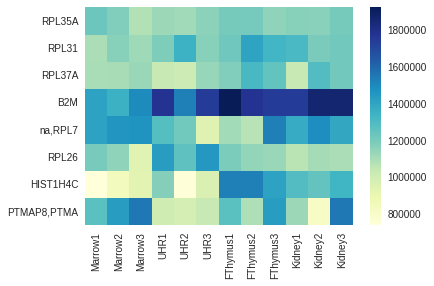

In [376]:
#14 Similarity Heatmap
SimilarExpress=[]
SimilarGene=[]
for i in indices:
  SimilarExpress.append(Express[len(tissues_chosen)*i:len(tissues_chosen)*i+len(tissues_chosen)])
  SimilarGene.append(Gene_list[i])
sns.heatmap(SimilarExpress, xticklabels=tissues_chosen, yticklabels=SimilarGene, cmap="YlGnBu")

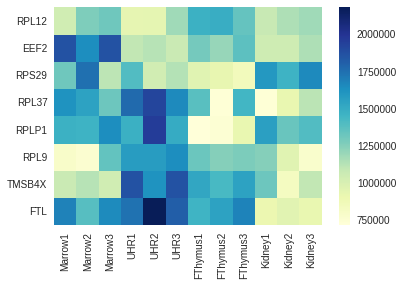

In [377]:
#14 Dissimilarity Heatmap
DissimilarExpress=[]
DissimilarGene=[]
for i in indixes:
  DissimilarExpress.append(Express[len(tissues_chosen)*i:len(tissues_chosen)*i+len(tissues_chosen)])
  DissimilarGene.append(Gene_list[i])
sns.heatmap(DissimilarExpress, xticklabels=tissues_chosen, yticklabels=DissimilarGene, cmap="YlGnBu")